In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings( 'ignore')

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv("/content/TRAIN.csv",index_col=0)
#now see what data looks like
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,42,1,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1625,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1626,25,1,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1


In [ ]:
df=pd.read_csv(r"/content/TRAIN.csv", index_col=0)
#now see what data looks like
df.head (5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1628 entries, 1 to 1628
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   Attrition                1628 non-null   int64 
 2   BusinessTravel           1628 non-null   object
 3   Department               1628 non-null   object
 4   DistanceFromHome         1628 non-null   int64 
 5   Education                1628 non-null   int64 
 6   EducationField           1628 non-null   object
 7   EmployeeNumber           1628 non-null   int64 
 8   EnvironmentSatisfaction  1628 non-null   int64 
 9   Gender                   1628 non-null   object
 10  JobInvolvement           1628 non-null   int64 
 11  JobRole                  1628 non-null   object
 12  JobSatisfaction          1628 non-null   int64 
 13  MaritalStatus            1628 non-null   object
 14  MonthlyIncome            1628 non-null   int6

In [ ]:
#lets check the no of rows and column of data and drop JobRole column
df = df .drop (['JobRole'], axis=1)
df. shape

(1628, 27)

In [ ]:
df = pd.read_csv("/content/TRAIN.csv", index_col=0)

non_numeric_cols = df.select_dtypes(include=["object"]).columns

# Print the non-numeric columns
print(f"Non-numeric columns: {non_numeric_cols}")

Non-numeric columns: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
df. BusinessTravel[df.BusinessTravel == 'Non-Travel' ] = 0
df .BusinessTravel[df.BusinessTravel == 'Travel_Rarely' ]= 1
df .BusinessTravel[df.BusinessTravel =='Travel_Frequently' ] = 2
df. Department [df .Department == 'Research & Development '] = 0
df. Department [df .Department == 'Sales'] = 1
df. Department [df. Department == 'Human Resources'] = 2
df .EducationField[df.EducationField == 'Medical'] = 0

df .EducationField[df.EducationField == 'Other'] = 2

df .EducationField[df.EducationField == 'Technical Degree'] = 4
df. EducationField[df.EducationField == 'Human Resources'] = 5
df.MaritalStatus[df.MaritalStatus =='Single'] = 0
df.MaritalStatus[df.MaritalStatus =='Married' ] = 1
df.MaritalStatus[df.MaritalStatus == 'Divorced' ] = 2
df. Gender[df. Gender == 'Male'] = 0
df. Gender [df. Gender == 'Female'] = 1
df. OverTime[df .OverTime == 'No' ]= 0
df .OverTime[df .OverTime == 'Yes'] = 1

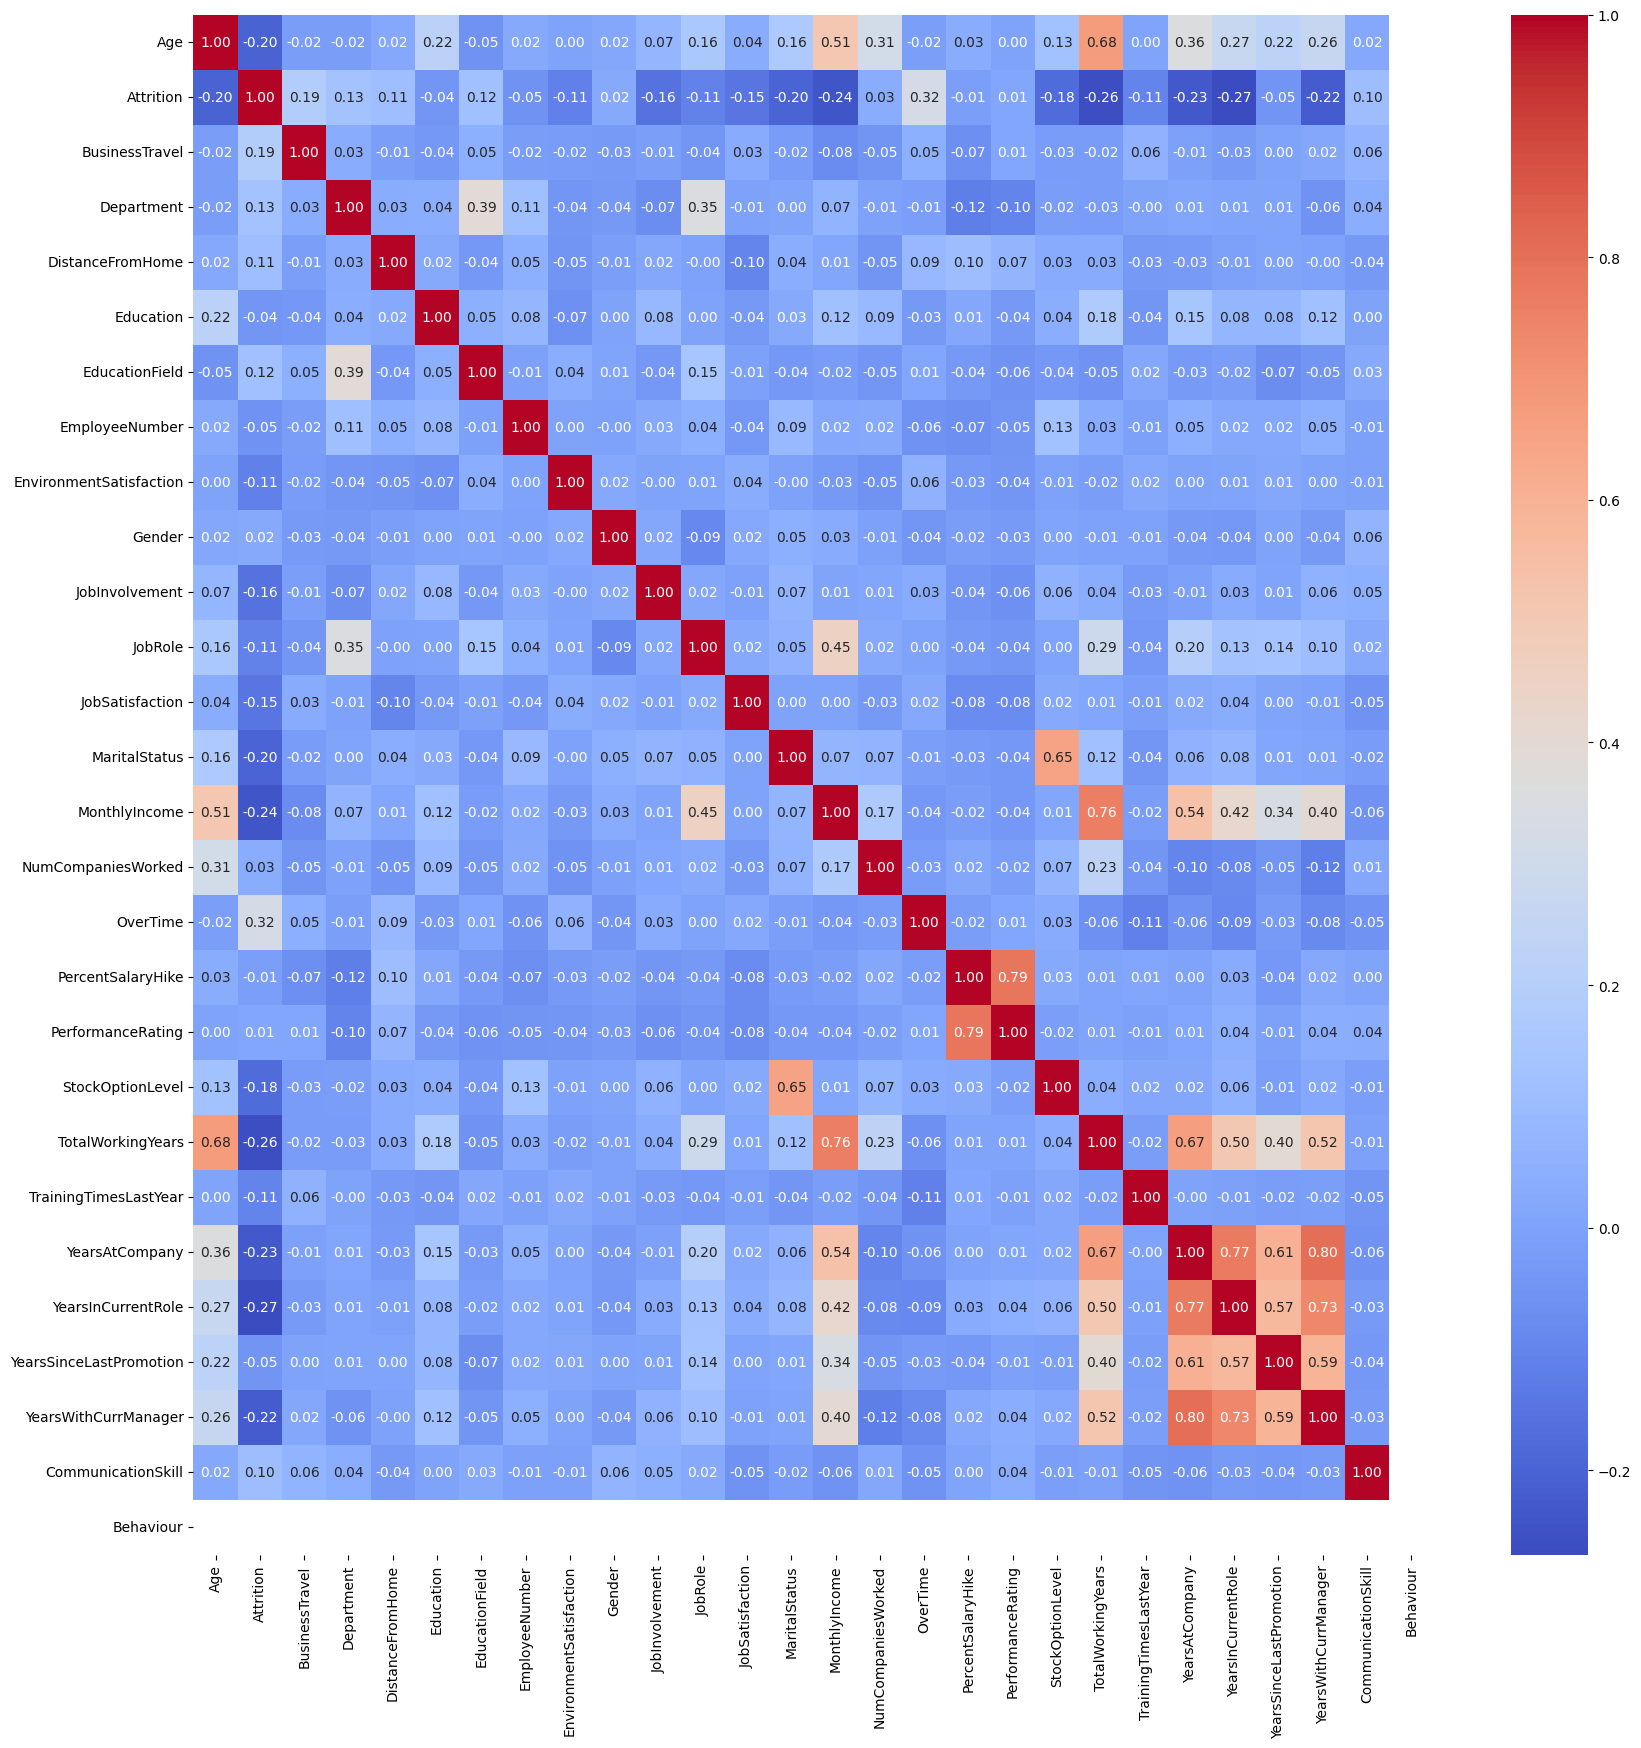

In [ ]:
non_numeric_cols = df.select_dtypes(include=["object"]).columns

# Convert non-numeric columns to numeric values
for col in non_numeric_cols:
    unique_values = df[col].unique()
    replacement_dict = {value: i for i, value in enumerate(unique_values)}
    df[col] = df[col].replace(replacement_dict)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
fig = plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

<Axes: ylabel='Id'>

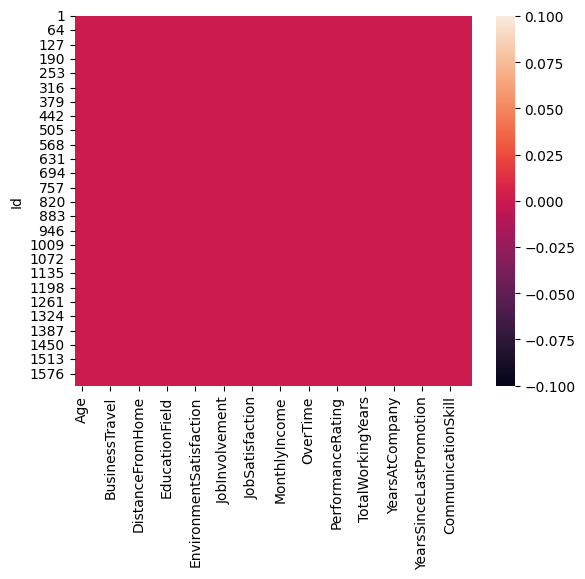

In [ ]:
sns.heatmap(df.isnull())

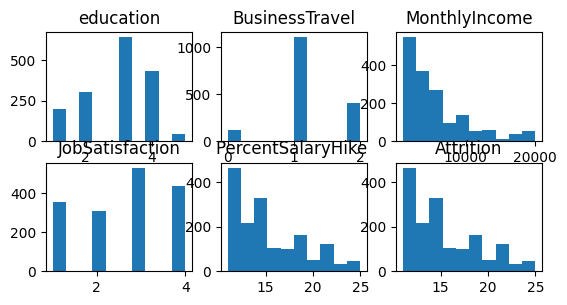

In [ ]:
a=df ['Education']
b=df ['BusinessTravel']
c=df ['MonthlyIncome']
d=df ['JobSatisfaction']
e=df ['PercentSalaryHike']
f=df['Attrition']
plt. subplot (331)
plt.hist(a)
plt.title("education")
plt. subplot (332)
plt. hist(b)
plt.title("BusinessTravel" )
plt.subplot (333)
plt.hist(c)
plt. title( "MonthlyIncome")
plt. subplot (334)
plt. hist(d)
plt.title("JobSatisfaction")
plt.subplot (335)
plt. hist(e)
plt. title("PercentSalaryHike ")
plt.subplot (336)
plt.hist(e)
plt. title("Attrition" )
plt. show()

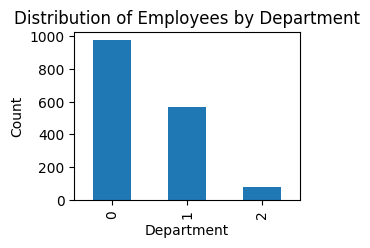

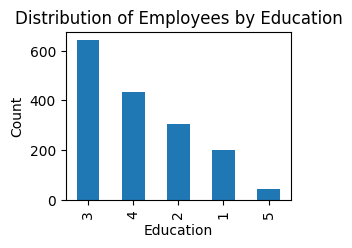

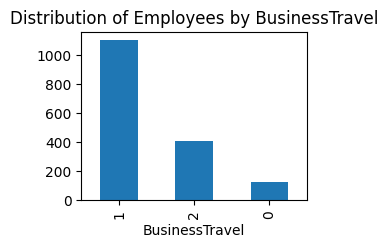

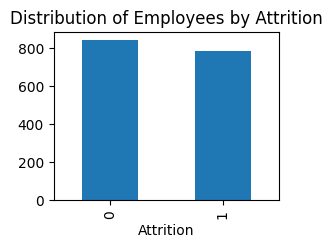

In [ ]:
data1 = df ['Department'].value_counts
plt.subplot (221)
data1().plot(kind='bar')
plt.xlabel ('Department' )
plt.ylabel( 'Count')
plt. title( 'Distribution of Employees by Department')
plt. show()

data = df ['Education']. value_counts ()
plt.subplot(222)
data. plot (kind='bar')
plt.xlabel( 'Education')
plt. ylabel( 'Count' )
plt.title( 'Distribution of Employees by Education')
plt.show()

data = df ['BusinessTravel']. value_counts ()
plt. subplot (223)
data. plot (kind='bar')
plt. title( 'Distribution of Employees by BusinessTravel')
plt. show()

data = df ['Attrition']. value_counts ()
plt. subplot (224)
data. plot(kind='bar')
plt. title( 'Distribution of Employees by Attrition' )
plt. show()

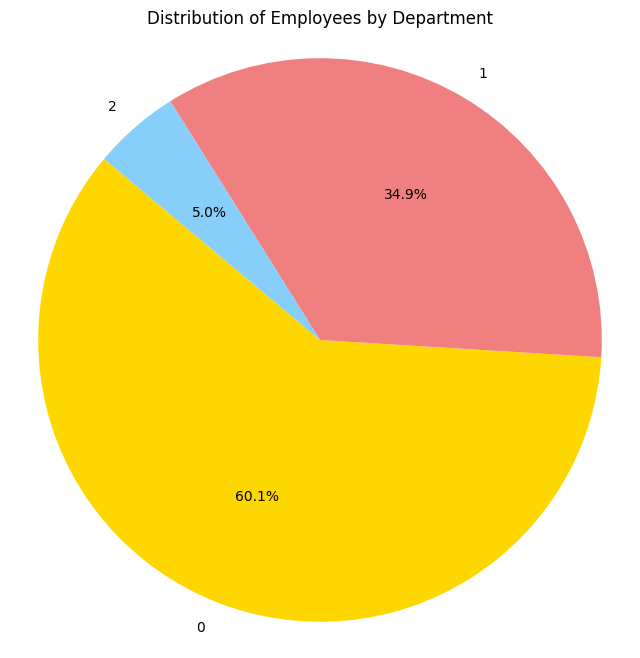

In [ ]:
import matplotlib.pyplot as plt

data1 = df['Department'].value_counts()
custom_colors = ['gold', 'Lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(data1, labels=data1.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribution of Employees by Department')
plt.axis('equal')
plt.show()

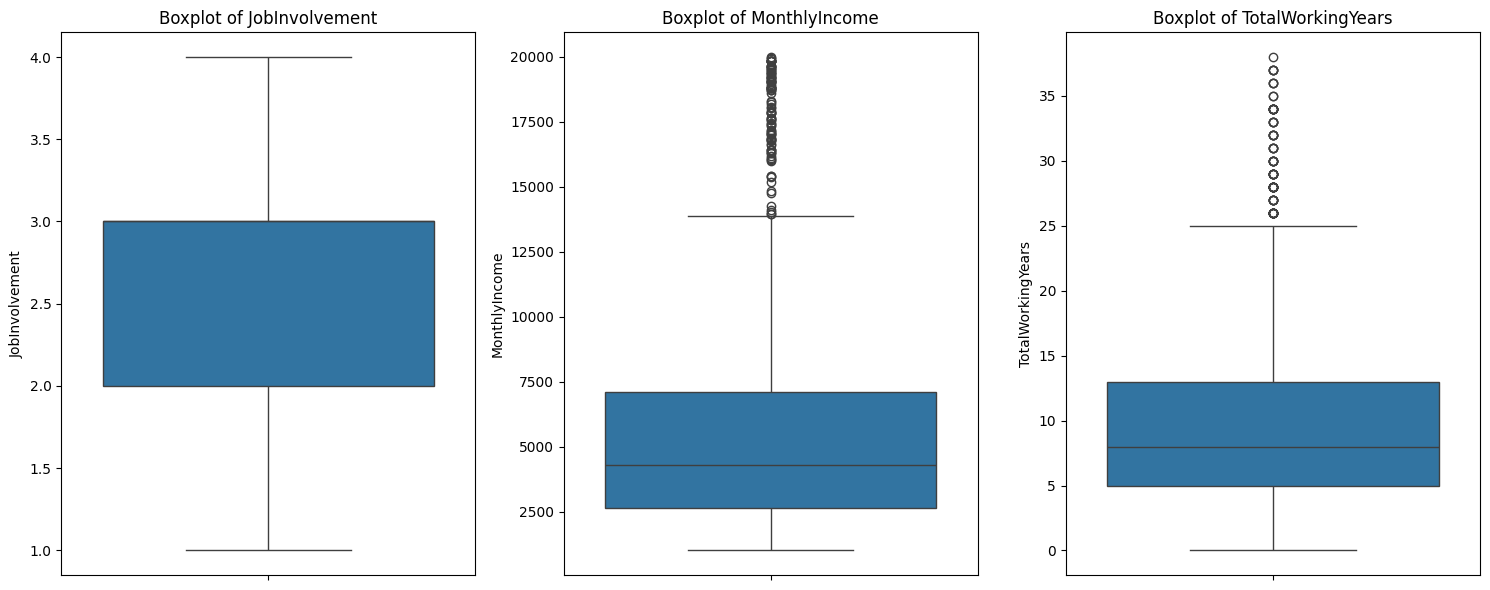

In [ ]:
selected_columns = ['JobInvolvement', 'MonthlyIncome', 'TotalWorkingYears']
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 6))
for i, col in enumerate(selected_columns):
   sns.boxplot(y=col, data=df, ax=axes[i])
   axes[i].set_title(f'Boxplot of {col}')
   axes[i].set_ylabel(col)
# Adjust the layout
plt.tight_layout ()
plt.show()

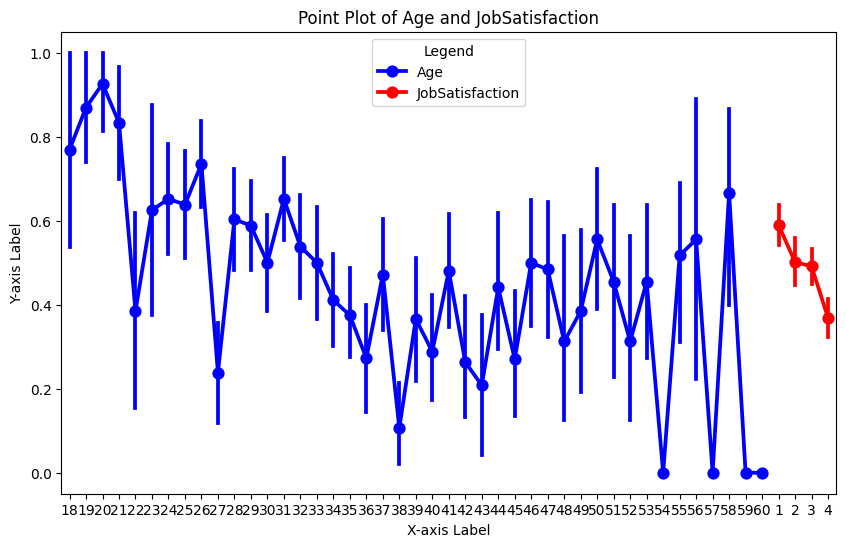

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Age', y='Attrition', data=df, color='blue', label='Age')
sns.pointplot(x='JobSatisfaction', y='Attrition', data=df, color='red', label='JobSatisfaction')
plt.xlabel('X-axis Label')
plt.ylabel ('Y-axis Label')
plt.title('Point Plot of Age and JobSatisfaction')
plt.legend (title='Legend')
plt.show()

In [ ]:
#these code will check for all duplicate or multiple entries and remove them
df.drop_duplicates(subset='EmployeeNumber', inplace=True)


In [ ]:
#new data has following number of rows and columns
df.shape

(1000, 28)

In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,0,0,2,3,0,571,3,0,...,3,0,12,2,11,7,6,7,4,1
2,36,0,1,0,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
3,55,1,1,1,2,1,0,842,3,1,...,3,0,12,3,9,7,7,3,5,1
4,39,0,1,0,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
5,37,0,1,0,3,3,2,689,3,1,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,36,0,0,1,10,4,0,592,2,1,...,3,0,10,3,10,3,9,7,4,1
997,40,0,1,0,16,3,1,1641,3,0,...,3,0,18,2,4,2,3,3,2,1
998,46,1,1,1,9,2,0,118,3,1,...,3,0,9,3,9,8,4,7,4,1


In [ ]:
#splitting dataset
y=df['Attrition']
x=df.drop('Attrition',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=5000)

In [ ]:
#comparing algorithms
#RandomForestClassifier
xg = RandomForestClassifier()
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.87


In [ ]:
#DecisionTreeClassifier
xg = DecisionTreeClassifier()
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.77


In [ ]:
#Adaboost classifier
xg = AdaBoostClassifier()
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.89


In [ ]:
xg = LogisticRegression()
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.85


In [ ]:
xg = SVC()
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.86


In [ ]:

xg = AdaBoostClassifier(n_estimators=50, learning_rate=.5, algorithm='SAMME', random_state=10)
xg.fit(x_train, y_train)
y_pred_class = xg.predict(x_test)



print(metrics.accuracy_score(y_test, y_pred_class))

0.9


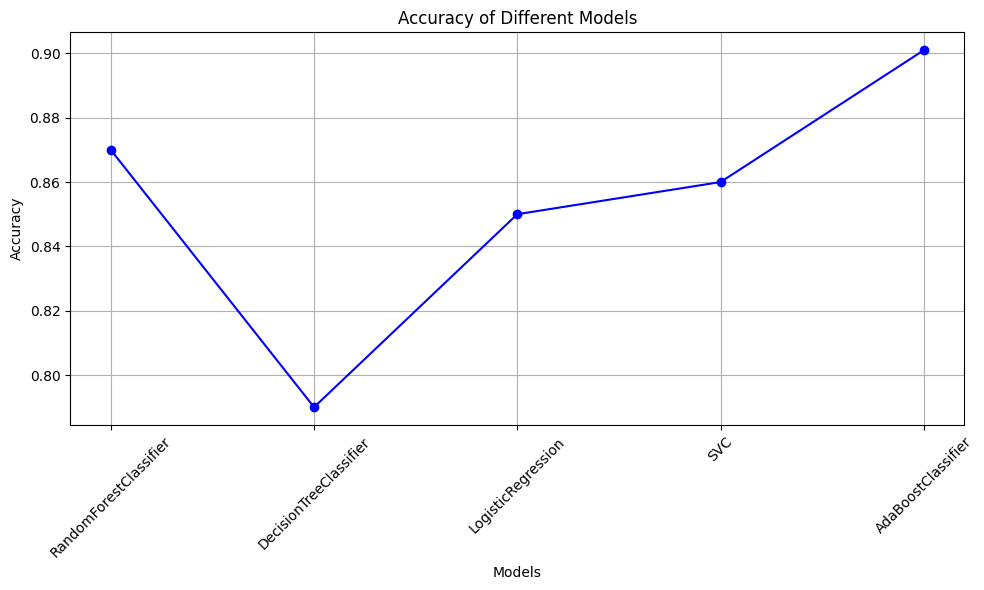

In [ ]:
accuracy_scores = [0.87, 0.79, 0.85, 0.86, 0.901]
model_names = ["RandomForestClassifier", "DecisionTreeClassifier", "LogisticRegression", "SVC", "AdaBoostClassifier"]
# Create a linear plot of accuracy scores
plt.figure(figsize=(10, 6))
plt.plot (model_names, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
# Rotate the x-axis labels for better readability (optional)
plt.xticks (rotation=45)
plt.tight_layout ( )
plt.show()